- Dataset contains the following columns:
    - ID: 레코드의 고유 식별자
    - Case Number: 사건의 시카고 경찰국 RD번호(기록부 번호)
    - Date: 사건 발생 날짜
    - Block: 사건 발생된 부분 수정된 주소, 실제 주소와 동일한 블록
    - IUCR: 일리노이주 Unifrom범죄 신고 코드.
    - Primary Type: IUCR 코드의 기본 설
    - Description: IUCR 코드의 2차 설명, 1차 설명의 하위 범주
    - Location Description: 사건이 발생한 위치
    - Arrest: 체포 여부
    - Domestic: 사건이 일리노이주 가정폭력법에 정의된 가정과 관련된 것인지의 여부
    - Beat: 사건이 발생한 비트.
    비트란? 경찰이 지리적으로 가장 작은 영역
    (각 비트에는 전용 경찰 비트 차량이 있습니다. 3~5개의 비트가 경찰 구역을 구성하고, 3개 구역이 경찰 구역을 구성합니다. 시카고 경찰국에는 22개의 경찰 구역이 있습니다.)
    - District: 사건이 발생한 경찰 구역
    - Ward: 사건이 발생한 시의회 구
    - Community Area: 사건이 발생한 커뮤니티 지역. 시카고는 총 77개의 구역이 있다.
    - FBI Code: FBI의 NIBRS(National Incident-Based Reporting System)에 설명된 범죄 분류
    - X Coordinate: 일리노이주 동부 NAD 1983 투영에서 사건이 발생한 위치의 x 좌표
    - Y Coordinate: 일리노이 주 동부 NAD 1983 투영에서 사건이 발생한 위치의 y 좌표
    - Year: 사건 발생 연
    - Updated On: 기록이 마지막으로 업데이트된 날짜 및 시간
    - Latitude: 사건이 발생한 위치의 위도
    - Longitude: 사건이 발생한 위치의 경도
    - Location: 이 데이터 포털에서 지도 및 기타 지리적 작업을 작성할 수 있는 형식으로 사고가 발생한 위치
- Datasource: https://www.kaggle.com/currie32/crimes-in-chicago

## 라이브러리 로드

In [ ]:
# numpy는 수학적 계산과 관련된 작업을 돕는 라이브러리입니다.
# pandas는 큰 데이터를 다룰 수 있도록 돕는 라이브러리입니다.
import numpy as np
import pandas as pd

# matplotlib.pyplot은 데이터와 관련된 그래프를 그릴 수 있도록 돕는 라이브러리입니다.
# seaborn은 데이터와 관련된 그래프를 그릴 수 있도록 돕는 라이브러리입니다.
import matplotlib.pyplot as plt
import seaborn as sns

# os는 운영체제와 관련된 작업을 돕는 라이브러리입니다.
import os

# sklearn.preprocessing은 데이터 전처리를 돕는 라이브러리입니다.
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 데이터 확인

In [ ]:
chicagoCSV1 = '/content/drive/MyDrive/구글클라우드인공지능개발자과정 1기/프로젝트/02_Crimes in Chicago/Chicago_Crimes_2008_to_2011.csv'
chicagoCSV2 = '/content/drive/MyDrive/구글클라우드인공지능개발자과정 1기/프로젝트/02_Crimes in Chicago/Chicago_Crimes_2012_to_2017.csv'

# error_bad_lines = False는 이 명령어가 발생한 모든 오류를 제거해준다.
chicago_df_1 = pd.read_csv(chicagoCSV1, error_bad_lines=False)
chicago_df_2 = pd.read_csv(chicagoCSV2, error_bad_lines=False)

<ipython-input-3-5d214548ae64>:5: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  chicago_df_1 = pd.read_csv(chicagoCSV1, error_bad_lines=False)
Skipping line 1149094: expected 23 fields, saw 41

<ipython-input-3-5d214548ae64>:6: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  chicago_df_2 = pd.read_csv(chicagoCSV2, error_bad_lines=False)


In [ ]:
chicago_df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2688710 entries, 0 to 2688709
Data columns (total 23 columns):
 #   Column                Dtype  
---  ------                -----  
 0   Unnamed: 0            int64  
 1   ID                    int64  
 2   Case Number           object 
 3   Date                  object 
 4   Block                 object 
 5   IUCR                  object 
 6   Primary Type          object 
 7   Description           object 
 8   Location Description  object 
 9   Arrest                bool   
 10  Domestic              bool   
 11  Beat                  int64  
 12  District              float64
 13  Ward                  float64
 14  Community Area        float64
 15  FBI Code              object 
 16  X Coordinate          float64
 17  Y Coordinate          float64
 18  Year                  int64  
 19  Updated On            object 
 20  Latitude              float64
 21  Longitude             float64
 22  Location              object 
dtypes: bool

In [ ]:
# 데이터를 합치기 전 확인
chicago_df_1.head(2)

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,388,4785,HP610824,10/07/2008 12:39:00 PM,000XX E 75TH ST,0110,HOMICIDE,FIRST DEGREE MURDER,ALLEY,True,...,6.0,69.0,01A,1178207.0,1855308.0,2008,08/17/2015 03:03:40 PM,41.758276,-87.622451,"(41.758275857, -87.622451031)"
1,835,4786,HP616595,10/09/2008 03:30:00 AM,048XX W POLK ST,0110,HOMICIDE,FIRST DEGREE MURDER,STREET,True,...,24.0,25.0,01A,1144200.0,1895857.0,2008,08/17/2015 03:03:40 PM,41.870252,-87.746069,"(41.87025207, -87.746069362)"


In [ ]:
chicago_df_2.head(2)

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,3,10508693,HZ250496,05/03/2016 11:40:00 PM,013XX S SAWYER AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,...,24.0,29.0,08B,1154907.0,1893681.0,2016,05/10/2016 03:56:50 PM,41.864073,-87.706819,"(41.864073157, -87.706818608)"
1,89,10508695,HZ250409,05/03/2016 09:40:00 PM,061XX S DREXEL AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,...,20.0,42.0,08B,1183066.0,1864330.0,2016,05/10/2016 03:56:50 PM,41.782922,-87.604363,"(41.782921527, -87.60436317)"


In [ ]:
# axis = 0 (행) / axis = 1 (열)
chicago_df = pd.concat([chicago_df_1, chicago_df_2], ignore_index = False, axis = 0)

In [ ]:
chicago_df.head(3)

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,388,4785,HP610824,10/07/2008 12:39:00 PM,000XX E 75TH ST,0110,HOMICIDE,FIRST DEGREE MURDER,ALLEY,True,...,6.0,69.0,01A,1178207.0,1855308.0,2008,08/17/2015 03:03:40 PM,41.758276,-87.622451,"(41.758275857, -87.622451031)"
1,835,4786,HP616595,10/09/2008 03:30:00 AM,048XX W POLK ST,0110,HOMICIDE,FIRST DEGREE MURDER,STREET,True,...,24.0,25.0,01A,1144200.0,1895857.0,2008,08/17/2015 03:03:40 PM,41.870252,-87.746069,"(41.87025207, -87.746069362)"
2,1334,4787,HP616904,10/09/2008 08:35:00 AM,030XX W MANN DR,0110,HOMICIDE,FIRST DEGREE MURDER,PARK PROPERTY,False,...,18.0,66.0,01A,1157314.0,1859778.0,2008,08/17/2015 03:03:40 PM,41.770990,-87.698901,"(41.770990476, -87.698901469)"


In [ ]:
chicago_df.shape

(4145424, 23)

In [ ]:
# 필요없는 컬럼들 삭제!!!!!!  (axis = 1으로 전체 열 삭제)
chicago_df.drop(['Unnamed: 0', 'Case Number', 'Case Number', 'IUCR', 'X Coordinate', 'Y Coordinate','Updated On','Year', 'FBI Code', 'Beat','Ward','Community Area', 'Location', 'District', 'Latitude' , 'Longitude'], inplace = True, axis = 1)

In [ ]:
chicago_df.head(3)

,ID,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic
0,4785,10/07/2008 12:39:00 PM,000XX E 75TH ST,HOMICIDE,FIRST DEGREE MURDER,ALLEY,True,False
1,4786,10/09/2008 03:30:00 AM,048XX W POLK ST,HOMICIDE,FIRST DEGREE MURDER,STREET,True,False
2,4787,10/09/2008 08:35:00 AM,030XX W MANN DR,HOMICIDE,FIRST DEGREE MURDER,PARK PROPERTY,False,False


In [ ]:
chicago_df.tail(3)

,ID,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic
1456711,10508681,05/03/2016 12:15:00 AM,024XX W 63RD ST,BATTERY,AGGRAVATED: HANDGUN,SIDEWALK,False,False
1456712,10508690,05/03/2016 09:07:00 PM,082XX S EXCHANGE AVE,BATTERY,DOMESTIC BATTERY SIMPLE,SIDEWALK,False,True
1456713,10508692,05/03/2016 11:38:00 PM,001XX E 75TH ST,OTHER OFFENSE,OTHER WEAPONS VIOLATION,PARKING LOT/GARAGE(NON.RESID.),True,False


In [ ]:
chicago_df['Date'] = pd.to_datetime(chicago_df['Date'], format='%m/%d/%Y %I:%M:%S %p')

In [ ]:
# 인덱스를 날짜로 설정.
chicago_df.index = pd.DatetimeIndex(chicago_df.Date)

In [ ]:
chicago_df.head(2)

,ID,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic
Date,,,,,,,,
2008-10-07 12:39:00,4785,2008-10-07 12:39:00,000XX E 75TH ST,HOMICIDE,FIRST DEGREE MURDER,ALLEY,True,False
2008-10-09 03:30:00,4786,2008-10-09 03:30:00,048XX W POLK ST,HOMICIDE,FIRST DEGREE MURDER,STREET,True,False


In [ ]:
chicago_df.isnull().sum()

ID                         0
Date                       0
Block                      0
Primary Type               0
Description                0
Location Description    1949
Arrest                     0
Domestic                   0
dtype: int64

## 시각화 확인

<Axes: xlabel='Arrest', ylabel='count'>

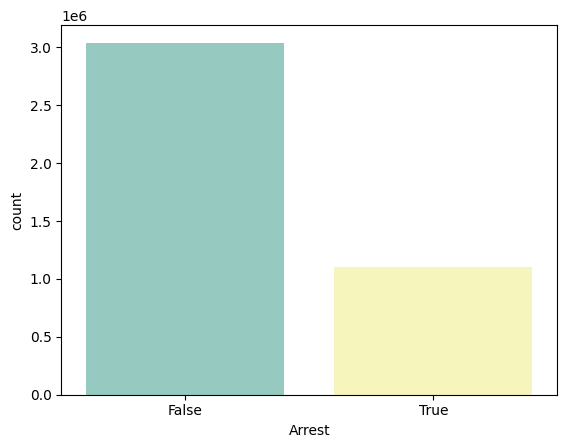

In [ ]:
# 체포여부(Arrest)
sns.countplot(x = 'Arrest', data = chicago_df, palette = 'Set3')

In [ ]:
# 범죄 신고 코드타입 상위 10개
chicago_top = chicago_df['Primary Type'].value_counts().iloc[:10]
chicago_top

THEFT                  887556
BATTERY                737615
CRIMINAL DAMAGE        471394
NARCOTICS              436317
BURGLARY               265578
OTHER OFFENSE          253828
ASSAULT                249518
MOTOR VEHICLE THEFT    184610
DECEPTIVE PRACTICE     167977
ROBBERY                163547
Name: Primary Type, dtype: int64

<Axes: xlabel='Arrest', ylabel='Density'>

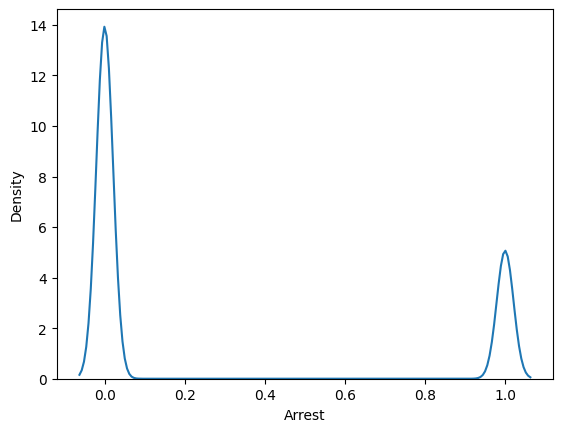

In [ ]:
# 0 = False / 1 = True 체포안된사람이 더 많다...
sns.kdeplot(x = chicago_df['Arrest'])

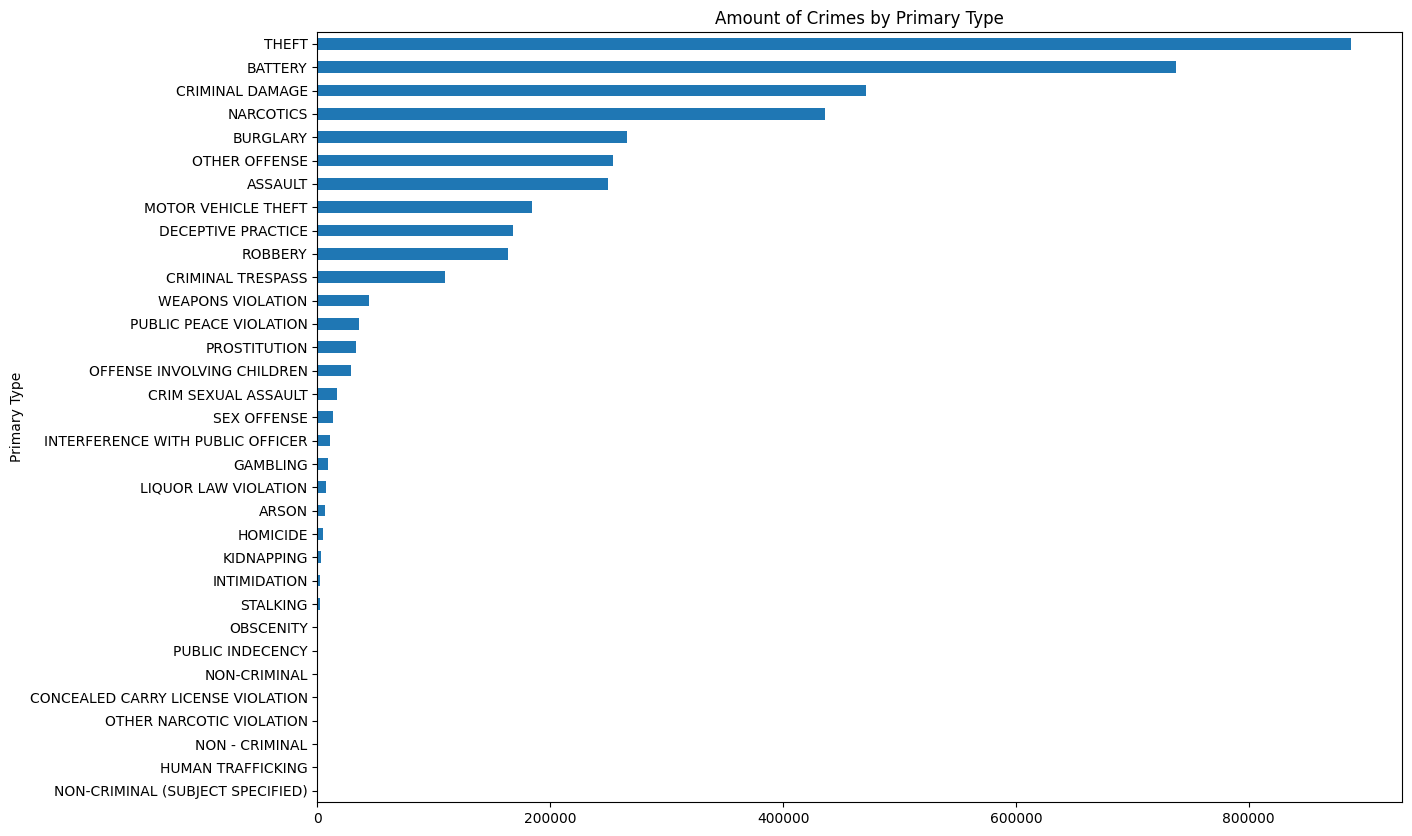

In [ ]:
# 유형별 범죄의 수

plt.figure(figsize=(14,10))
plt.title('Amount of Crimes by Primary Type')
plt.ylabel('Crime Type')
plt.xlabel('Amount of Crimes')
chicago_df.groupby([chicago_df['Primary Type']]).size().sort_values(ascending=True).plot(kind='barh')
plt.show()

In [ ]:
corr1 = chicago_df.corr()
corr1.style.background_gradient(cmap='coolwarm')

<ipython-input-51-24825a341b1b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr1 = chicago_df.corr()


,ID,Arrest,Domestic
ID,1.000000,-0.023347,0.032820
Arrest,-0.023347,1.000000,-0.067203
Domestic,0.032820,-0.067203,1.000000


<Axes: xlabel='count', ylabel='Primary Type'>

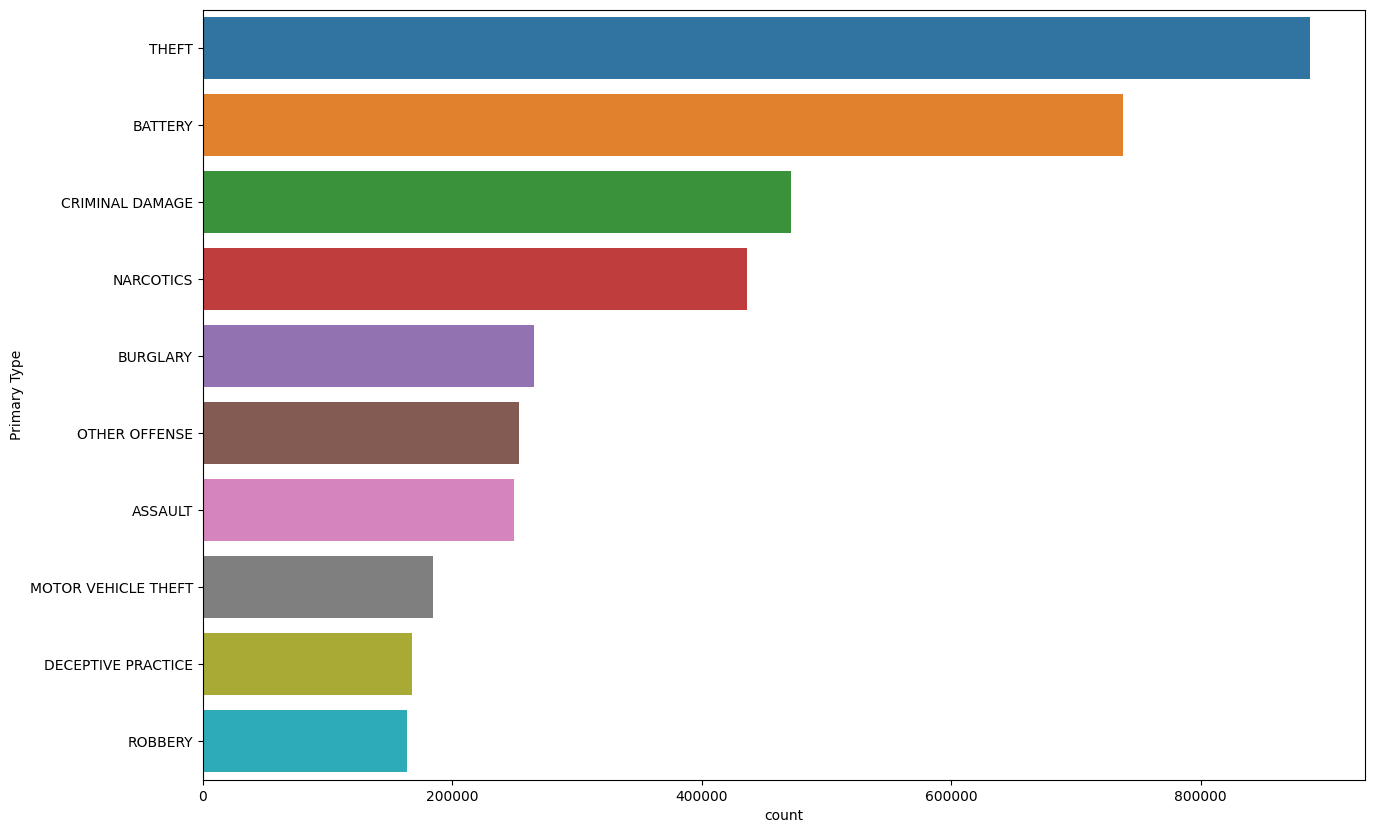

In [ ]:
# 범죄 신고 코드타입 상위10개의 그래프
plt.figure(figsize = (15, 10))
sns.countplot(y= 'Primary Type', data = chicago_df, order = chicago_top.index)

<Axes: xlabel='count', ylabel='Location Description'>

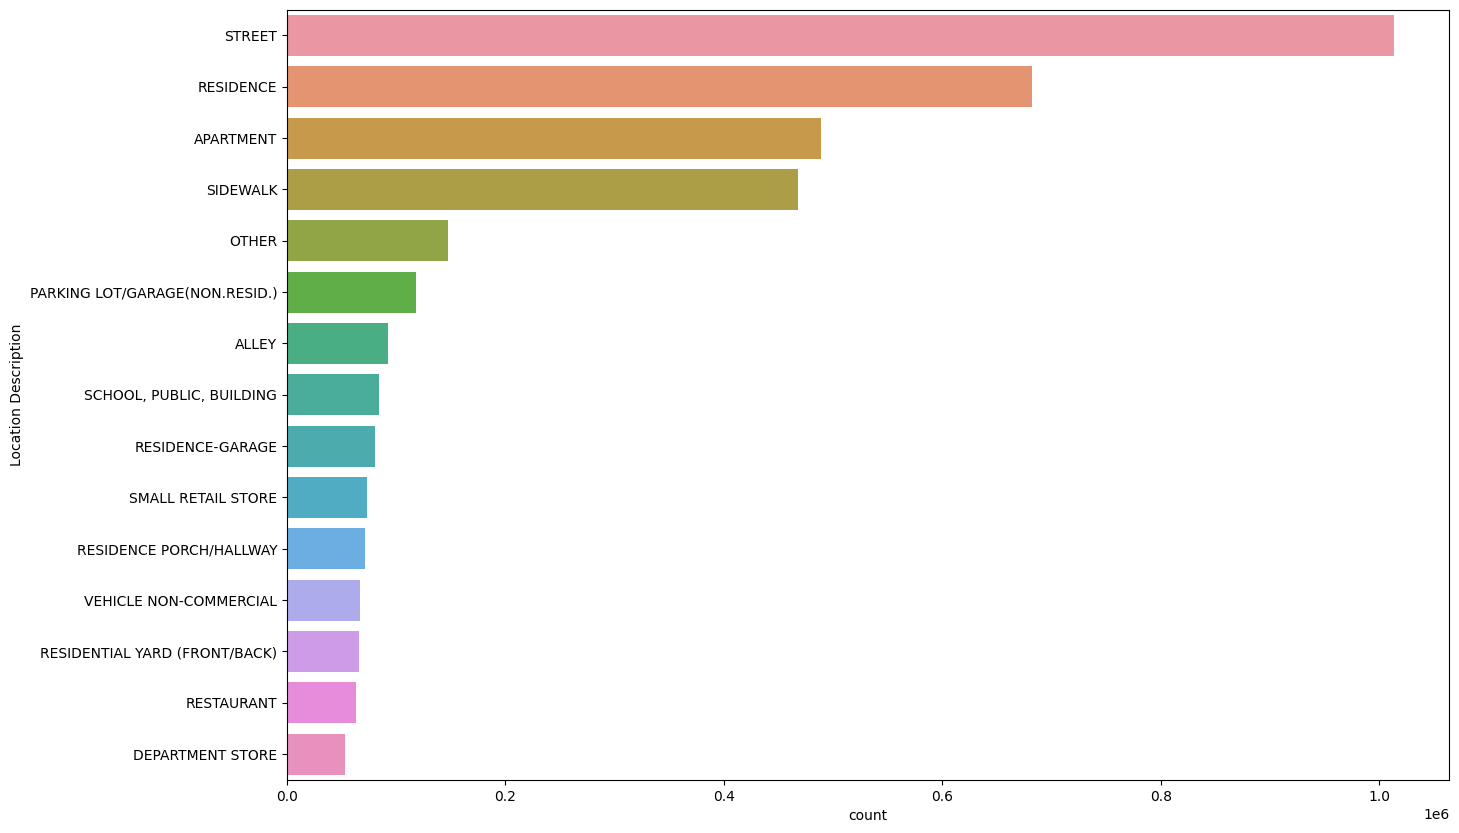

In [ ]:
# 사건 발생위치의 상위 10개의 그래프
plt.figure(figsize = (15, 10))
sns.countplot(y= 'Location Description', data = chicago_df, order = chicago_df['Location Description'].value_counts().iloc[:15].index)

In [ ]:
chicago_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4145424 entries, 2008-10-07 12:39:00 to 2016-05-03 23:38:00
Data columns (total 8 columns):
 #   Column                Dtype         
---  ------                -----         
 0   ID                    int64         
 1   Date                  datetime64[ns]
 2   Block                 object        
 3   Primary Type          object        
 4   Description           object        
 5   Location Description  object        
 6   Arrest                bool          
 7   Domestic              bool          
dtypes: bool(2), datetime64[ns](1), int64(1), object(4)
memory usage: 229.3+ MB


In [ ]:
# ('연도')기준으로 다시 샘플링을 해서 size()발생빈도를 확인한다.
chicago_df.resample('Y').size()

Date
2008-12-31    852053
2009-12-31    783900
2010-12-31    700691
2011-12-31    352066
2012-12-31    335670
2013-12-31    306703
2014-12-31    274527
2015-12-31    262995
2016-12-31    265462
2017-12-31     11357
Freq: A-DEC, dtype: int64

Text(0, 0.5, 'Number of Crimes')

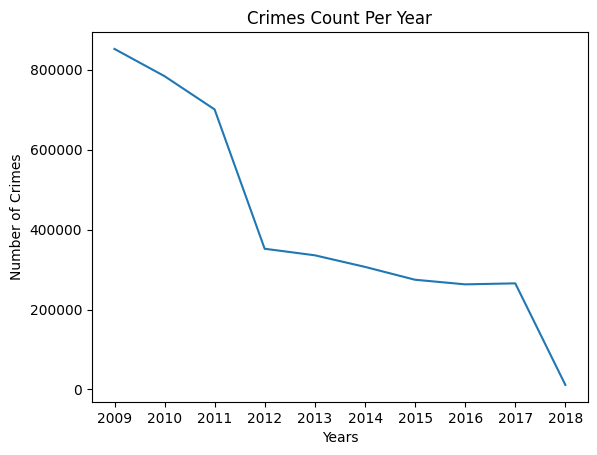

In [ ]:
plt.plot(chicago_df.resample('Y').size())
plt.title('Crimes Count Per Year')
plt.xlabel('Years')
plt.ylabel('Number of Crimes')

In [ ]:
# 두 데이터프레임을 결합한 결과 데이터프레임을 CSV 파일로 저장
chicago_df.to_csv('combined_chicago_data.csv', index=False)

In [ ]:
# 먼저 데이터프레임을 읽을 때 datetime 형식으로 열을 파싱하고 DatetimeIndex로 설정
chicago_df = pd.read_csv('/content/drive/MyDrive/구글클라우드인공지능개발자과정 1기/프로젝트/02_Crimes in Chicago/combined_chicago_data.csv', parse_dates=['Date'], index_col='Date')

## prophet 시작!

In [ ]:
#코랩은 이미 'prophet'이 설치가 되어있기 때문에 아래와 같이 임포트만 해준다
from prophet import Prophet

In [ ]:
# # ('월')기준으로 다시 샘플링을 해서 size()발생빈도를 확인한 뒤,  chicago_prophet변수에 담아준다.
chicago_prophet = chicago_df.resample('M').size().reset_index()
chicago_prophet

,Date,0
0,2008-01-31,66483
1,2008-02-29,57378
2,2008-03-31,67662
3,2008-04-30,71002
4,2008-05-31,76034
...,...,...
104,2016-09-30,23235
105,2016-10-31,23314
106,2016-11-30,21140
107,2016-12-31,19580


In [ ]:
chicago_prophet.columns = ['Date', 'Crime Count']
chicago_prophet

,Date,Crime Count
0,2008-01-31,66483
1,2008-02-29,57378
2,2008-03-31,67662
3,2008-04-30,71002
4,2008-05-31,76034
...,...,...
104,2016-09-30,23235
105,2016-10-31,23314
106,2016-11-30,21140
107,2016-12-31,19580


In [ ]:
chicago_prophet_df = pd.DataFrame(chicago_prophet)
chicago_prophet_df

,Date,Crime Count
0,2008-01-31,66483
1,2008-02-29,57378
2,2008-03-31,67662
3,2008-04-30,71002
4,2008-05-31,76034
...,...,...
104,2016-09-30,23235
105,2016-10-31,23314
106,2016-11-30,21140
107,2016-12-31,19580


## 예측

In [ ]:
chicago_prophet_df.columns

Index(['Date', 'Crime Count'], dtype='object')

In [ ]:
# Date와 Crime Count의 열의 이름을 'ds'와 'y'로 수정.
# 페이스북 Prophet 적용에 필요. Prophet은 예언자라는데... 과연??
chicago_prophet_df_final = chicago_prophet_df.rename(columns={'Date':'ds', 'Crime Count':'y'})
chicago_prophet_df_final

,ds,y
0,2008-01-31,66483
1,2008-02-29,57378
2,2008-03-31,67662
3,2008-04-30,71002
4,2008-05-31,76034
...,...,...
104,2016-09-30,23235
105,2016-10-31,23314
106,2016-11-30,21140
107,2016-12-31,19580


In [ ]:
# chicago_prophet_df_final의 데이터를 fit(학습) 한다.
m = Prophet()
m.fit(chicago_prophet_df_final)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxifz91w1/8gzwfij6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxifz91w1/2b9fcm7h.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=36587', 'data', 'file=/tmp/tmpxifz91w1/8gzwfij6.json', 'init=/tmp/tmpxifz91w1/2b9fcm7h.json', 'output', 'file=/tmp/tmpxifz91w1/prophet_modelt79e_u62/prophet_model-20231027005014.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:50:14 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:50:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
# 예측! 드디어 예측한다.
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)

In [ ]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2008-01-31,78699.595428,66024.843547,80653.992351,78699.595428,78699.595428,-5618.211817,-5618.211817,-5618.211817,-5618.211817,-5618.211817,-5618.211817,0.0,0.0,0.0,73081.383611
1,2008-02-29,77772.444713,61165.245555,75648.252200,77772.444713,77772.444713,-9309.311232,-9309.311232,-9309.311232,-9309.311232,-9309.311232,-9309.311232,0.0,0.0,0.0,68463.133481
2,2008-03-31,76781.352569,67528.315492,82518.576703,76781.352569,76781.352569,-1726.851110,-1726.851110,-1726.851110,-1726.851110,-1726.851110,-1726.851110,0.0,0.0,0.0,75054.501459
3,2008-04-30,75822.231140,67108.919349,81516.135830,75822.231140,75822.231140,-1229.834248,-1229.834248,-1229.834248,-1229.834248,-1229.834248,-1229.834248,0.0,0.0,0.0,74592.396892
4,2008-05-31,74831.138995,70027.409589,85039.930916,74831.138995,74831.138995,2687.621886,2687.621886,2687.621886,2687.621886,2687.621886,2687.621886,0.0,0.0,0.0,77518.760880
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
469,2018-01-27,16399.776773,2418.206084,16874.384577,15786.004752,17000.713113,-6628.855765,-6628.855765,-6628.855765,-6628.855765,-6628.855765,-6628.855765,0.0,0.0,0.0,9770.921008
470,2018-01-28,16394.070575,2606.086545,17282.473805,15777.284087,16998.317063,-6397.191696,-6397.191696,-6397.191696,-6397.191696,-6397.191696,-6397.191696,0.0,0.0,0.0,9996.878878
471,2018-01-29,16388.364376,3260.324439,17674.238079,15768.610289,16995.627041,-6115.597587,-6115.597587,-6115.597587,-6115.597587,-6115.597587,-6115.597587,0.0,0.0,0.0,10272.766790
472,2018-01-30,16382.658178,3029.817405,17004.885185,15760.022479,16992.937019,-5792.400476,-5792.400476,-5792.400476,-5792.400476,-5792.400476,-5792.400476,0.0,0.0,0.0,10590.257702


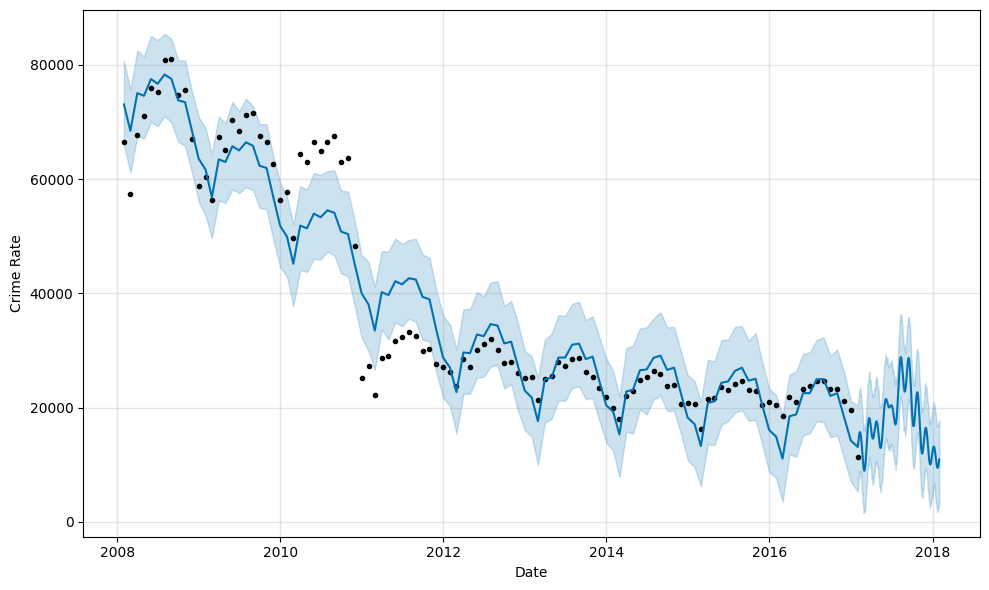

In [ ]:
figure = m.plot(forecast, xlabel='Date', ylabel='Crime Rate')

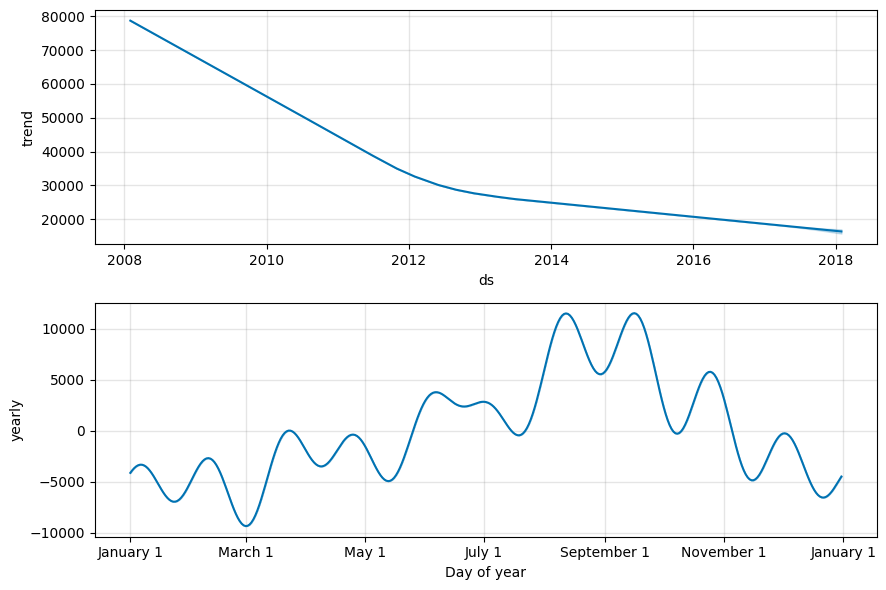

In [ ]:
figure3 = m.plot_components(forecast)